# Simple linear regression - Exercise

You are given a real estate dataset. 

Real estate is one of those examples that every regression course goes through as it is extremely easy to understand and there is a (almost always) certain causal relationship to be found.

The data is located in the file: 'real_estate_price_size.csv'. 

You are expected to create a simple linear regression (similar to the one in the lecture), using the new data. 

Apart from that, please:
-  Create a scatter plot (with or without a regression line)
-  Calculate the R-squared
-  Display the intercept and coefficient(s)
-  Using the model make a prediction about an apartment with size 750 sq.ft.

Note: In this exercise, the dependent variable is 'price', while the independent variable is 'size'.

Good luck!

## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
from sklearn.linear_model import LinearRegression

## Load the data

In [3]:
data = pd.read_csv('real_estate_price_size.csv')

In [4]:
data.head()

,price,size
0,234314.144,643.09
1,228581.528,656.22
2,281626.336,487.29
3,401255.608,1504.75
4,458674.256,1275.46


## Create the regression

### Declare the dependent and the independent variables

In [5]:
x = data['size']
y = data['price']

### Explore the data

In [6]:
x.shape
y.shape

(100,)

### Transform the inputs into a matrix (2D object)

In [7]:
x_matrix = x.values.reshape(-1,1)

### Regression itself

In [8]:
reg = LinearRegression()
reg.fit(x_matrix,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Calculate the R-squared

In [9]:
reg.score(x_matrix,y)

0.7447391865847586

### Find the intercept

In [10]:
reg.intercept_

101912.60180122912

### Find the coefficients

In [11]:
reg.coef_

array([223.17874259])

### Making predictions

You find an apartment online with a size of 750 sq.ft.

All else equal what should be its price according to the model?

In [12]:
new_data = pd.DataFrame(data=['750'], columns=['size'])

In [13]:
new_data

,size
0,750


In [14]:
reg.predict(new_data)

array([269296.65874718])

In [15]:
new_data['predicted price'] = reg.predict(new_data)
new_data

,size,predicted price
0,750,269296.658747


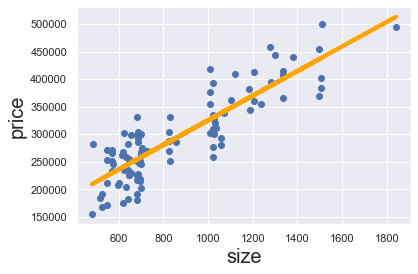

In [16]:
plt.scatter(x,y)
yhat = reg.coef_*x_matrix + reg.intercept_
fig = plt.plot(x,yhat, lw=4, c="orange", label = 'regression line')
plt.xlabel('size', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.show()